In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
path = Path('Images')
fns = get_image_files(path)
fns

(#124) [Path('Images/Ankit/A1.jpg'),Path('Images/Ankit/A10.jpg'),Path('Images/Ankit/A11.jpeg'),Path('Images/Ankit/A13.jpeg'),Path('Images/Ankit/A15.jpeg'),Path('Images/Ankit/A16.jpeg'),Path('Images/Ankit/A17.jpeg'),Path('Images/Ankit/A18.jpg'),Path('Images/Ankit/A19.jpeg'),Path('Images/Ankit/A2.jpeg')...]

In [4]:
harank = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [5]:
dls = harank.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


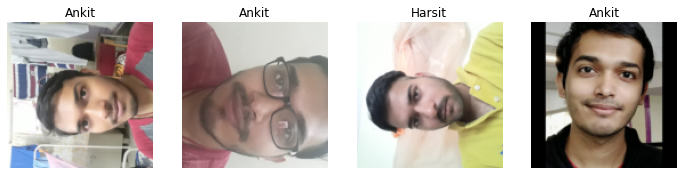

In [6]:
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


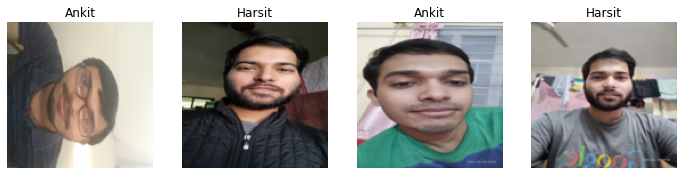

In [23]:
harank = harank.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = harank.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


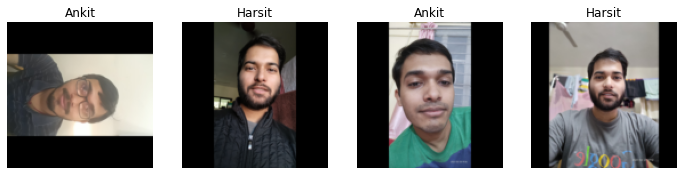

In [24]:
harank = harank.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = harank.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


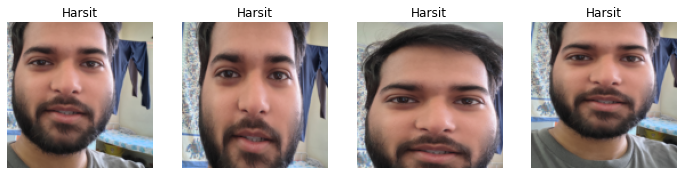

In [25]:
harank = harank.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = harank.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


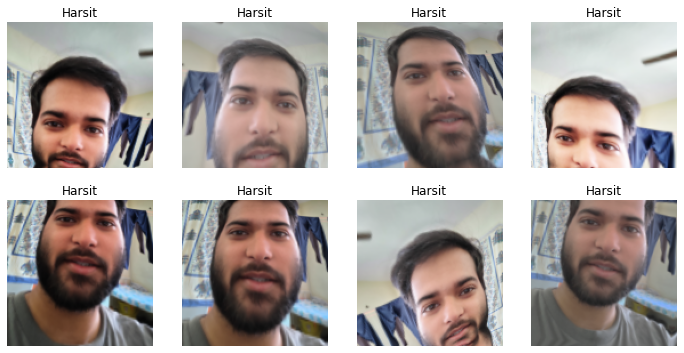

In [26]:
harank = harank.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = harank.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [7]:
harank = harank.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = harank.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\harsi\Anaconda3\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [111]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.089568,4.711054,0.583333,00:58


epoch,train_loss,valid_loss,error_rate,time
0,1.793955,3.506946,0.583333,00:59
1,1.563705,2.526939,0.583333,00:58
2,1.379766,1.803102,0.541667,00:59
3,1.173148,1.187524,0.333333,00:57
4,1.021780,0.809280,0.250000,00:59
5,0.950462,0.506962,0.291667,00:58
6,0.833435,0.295595,0.166667,00:57
7,0.758067,0.184902,0.083333,00:58
8,0.707157,0.136774,0.041667,00:59
9,0.649037,0.115066,0.041667,00:58


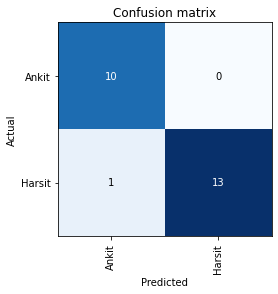

In [112]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

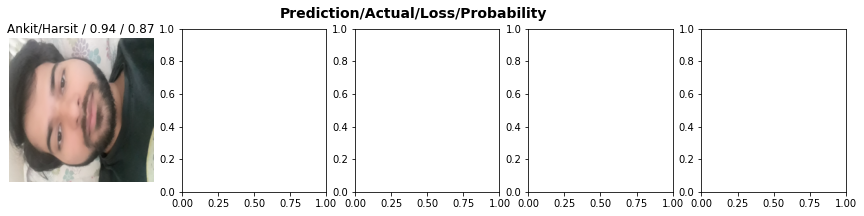

In [113]:
interp.plot_top_losses(5, nrows=1)

In [114]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [66]:
learn.export()

In [67]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [68]:
learn_inf = load_learner(path/'export.pkl')

In [101]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [102]:
img = PILImage.create(btn_upload.data[-1])


In [103]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [104]:
pred,pred_idx,probs = learn_inf.predict(img)

In [105]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Harsit; Probability: 0.9427')

In [83]:
btn_run = widgets.Button(description='Classify')
btn_run


Button(description='Classify', style=ButtonStyle())

In [84]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [85]:
btn_upload = widgets.FileUpload()

In [86]:
VBox([widgets.Label('Select your Hero!'), 
      btn_upload, btn_run, out_pl, lbl_pred])